In [1]:
# import python module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
# Define array of time
# --------------------
tmin = 487      # ~ base of Ordovician in Ma (GTS2020)
tmax = 443      # ~ base of Silurian in Ma (GST2020)
nt = 100000     # number of steps
dt = (tmin - tmax)*1e6 / nt    # size of each step
time = np.linspace(0, (tmin-tmax)*1e6, nt)    # time array
age = np.linspace(tmin, tmax, nt)             # age array (in Myr)

In [3]:
# Load digitized Ridge Generation Rate from Mills et al (2017)
MillsAge = np.load('../Data/RidgeProd.npz')['age']
MillsProd = np.load('../Data/RidgeProd.npz')['prod']

Millsfht = MillsProd/MillsProd[-1]

# resample Millsfht to an array size of age.size
f = interp1d(MillsAge, Millsfht, kind='quadratic')
fht = f(age)

# GEOCARB
Berner and Rye (1992) parameterize the global strontium flux from underwater basalt alteration $(F_{ob})$ as:

$$F_{ob} = f_{Sr}(t) \times F_{ob}(O)$$

where:

$f_{Sr}(t)$ : ratio of seafloor spreading at a given time in the past to that at present (see Gaffin (1987))

$F_{ob}(O)$ : sr flux at present day $(6.5 \times 10^{18})$

Text(0, 0.5, 'Sr Flux (mol/yr)')

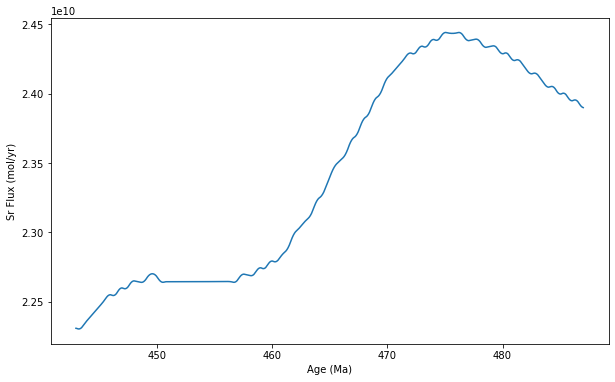

In [4]:
F_ob_0 = 1.5e10
F_geocarb = fht * F_ob_0

# Plot Result:
plt.figure(figsize=(10,6))
plt.plot(age, F_geocarb)
plt.xlabel('Age (Ma)')
plt.ylabel('Sr Flux (mol/yr)')

# Simplified approach (this study)

In this model we hypothesize a role for hydrothermal activities in perturbing global Sr cycles during the Ordovician. To model changes in hydrothermal activities we used eustatic sea level curves, assuming the long-term changes in sea levels are mainly controlled by changes in ocean basin geometry, which in turn depends on the rate of sea floor spreading.

Sea level curves were taken from Haq and Schutter (2008), and recalibrated to Geologic Time Scale 2020 (Goldman et al., 2020).

array size = 100000


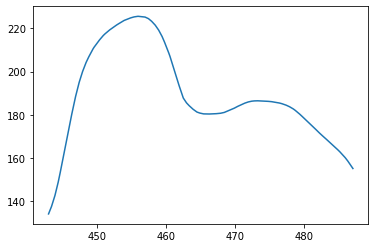

In [5]:
# load sea level data
ordosealevel = np.load("../Data/OrdoSeaLevel.npz")['SeaLevel']
ordoseaage = np.load("../Data/OrdoSeaLevel.npz")['age']

# resample data to fit our modeling array
f = interp1d(ordoseaage, ordosealevel)

sealevel = f(age)
plt.plot(age, sealevel)
print('array size =',len(sealevel))

Text(0, 0.5, 'Sr Flux (mol/yr)')

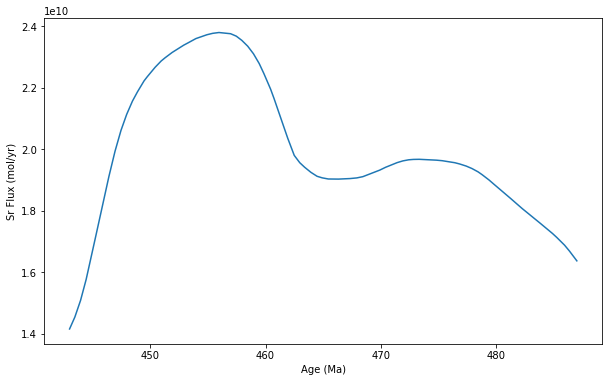

In [6]:
# normalize sea level relative to mean
sl_norm = sealevel / sealevel.mean()
Jh0 = 2e10
Jh_sl = sl_norm * Jh0

# Plot Result:
plt.figure(figsize=(10,6))
plt.plot(age, Jh_sl)
plt.xlabel('Age (Ma)')
plt.ylabel('Sr Flux (mol/yr)')

In [7]:
# Load seafloor production curve from Marcily et al., 2021
marcily = pd.read_csv('../Data/seafloorprod.csv')
marcily.head()

,age,geocarb,filtered,unfiltered
0,490.0,1.493253,1.577766,1.909892
1,489.5,1.491709,1.578308,1.912879
2,489.0,1.490456,1.579884,1.915650
3,488.5,1.489631,1.582502,1.918127
4,488.0,1.489246,1.586113,1.920230


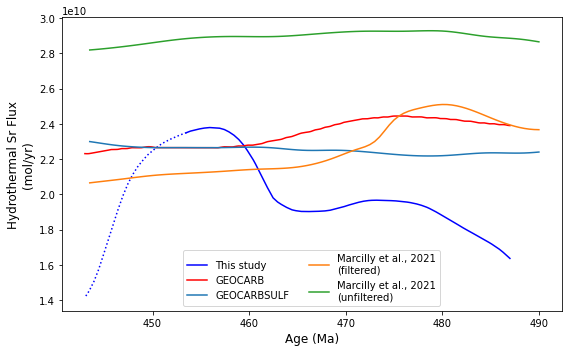

In [8]:
# Figure to make comparison
plt.figure(figsize=(8,5))

a = np.where(np.round(age)==453)[0][0]

# This Study
plt.plot(age[:a], Jh_sl[:a], 'b-', label='This study')
plt.plot(age[a:], Jh_sl[a:], 'b:')

# GEOCARB (digitized from Mills et al., 2017)
plt.plot(age, F_geocarb, 'r-', label='GEOCARB')

# Marcily et al., 2021 including GEOCARBSULF
plt.plot(marcily['age'], marcily['geocarb']*F_ob_0, label='GEOCARBSULF')
plt.plot(marcily['age'], marcily['filtered']*F_ob_0,
         label='Marcilly et al., 2021\n(filtered)')
plt.plot(marcily['age'], marcily['unfiltered']*F_ob_0,
         label='Marcilly et al., 2021\n(unfiltered)')

plt.xlabel('Age (Ma)', fontsize=12)
plt.ylabel('Hydrothermal Sr Flux\n(mol/yr)', fontsize=12)
plt.legend(ncol=2)

plt.tight_layout()
plt.savefig('../Figures/GeocarbCompare.png', dpi=300)
plt.savefig('../Figures/GeocarbCompare.svg')

In [9]:
np.mean(Jh_sl)

20000000000.000004